# ROC曲线

## 描述的是TPR 和 FPR 之间的关系

## TPR：True Positive Rate= TP/(TP+FN)= recall，实际为1，预测为1

## FPR：False Positive Rate = FP/(FP+TN)，实际为0，预测为1

In [1]:
import numpy as np
from sklearn.datasets import load_digits

In [2]:
digits=load_digits()

X=digits.data
y=digits.target

y[y!=9]=0
y[y==9]=1

In [3]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666)

In [7]:
log_reg=LogisticRegression()

log_reg.fit(X_train, y_train)
y_predict=log_reg.predict(X_test)

In [8]:
def TP(y_true, y_pred):
    return np.sum((y_true==1) & (y_pred==1))

def FP(y_true, y_pred):
    return np.sum((y_true==0) & (y_pred==1))

def TN(y_true, y_pred):
    return np.sum((y_true==0) & (y_pred==0))

def FN(y_true, y_pred):
    return np.sum((y_true==1) & (y_pred==0))

def FPR(y_true, y_pred):
    try:
        return FP(y_true, y_pred) / ( FP(y_true, y_pred) + TN(y_true, y_pred) )
    except:
        return 0.0
    
def TPR(y_true, y_pred):
    try:
        return TP(y_true, y_pred) / ( TP(y_true, y_pred) + FN(y_true, y_pred) )
    except:
        return 0.0

In [9]:
decision_scores=log_reg.decision_function(X_test)

In [10]:
decision_scores[:10]

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 ])

In [12]:
fprs=[]
tprs=[]
thresholds=np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for t in thresholds:
    y_predict_i=np.array(decision_scores>=t, dtype='int')
    fprs.append(FPR(y_test, y_predict_i))
    tprs.append(TPR(y_test, y_predict_i))

In [13]:
import matplotlib.pyplot as plt

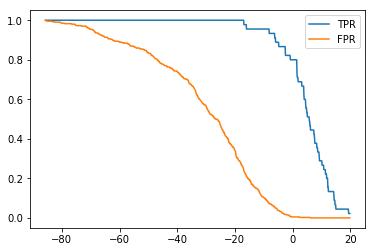

In [14]:
plt.plot(thresholds, tprs, label='TPR')
plt.plot(thresholds, fprs, label='FPR')
plt.legend()
plt.show()

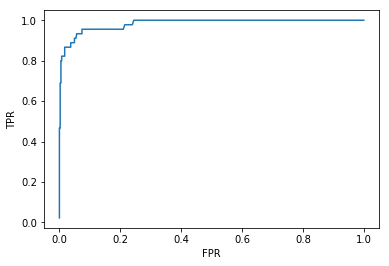

In [16]:
plt.plot(fprs, tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# sklearn中的ROC曲线

In [17]:
from sklearn.metrics import roc_curve

In [18]:
fprs2, tprs2, thresholds2 = roc_curve(y_test, decision_scores)

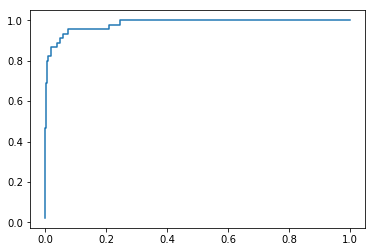

In [19]:
plt.plot(fprs2, tprs2)
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
roc_auc_score(y_test, decision_scores)

0.98304526748971188